Relación existente entre dos variables cuantitativas, ver si existe una relación entre esas doa variables, dos estadisticos que nos ayudan a medir que tanta relación hay: Pearson y Spearman. 

la correlación es relación reciproca entre dos variables, medida adimensional que mide el grado de intensidad de la linealidad entre dos variables, el resultado no tiene unidad de medida. 

Pearson:

1.  Toma valores entre -1 y 1. 
2. si el coeficiente de correlación de pearson es negativo, entonces la relación entre las dos variables cuantitativas es inversamente proporcional.
3. Positivo, la relación entre dos variables cuantitativas es directamente proporcional. 
4. Valor cercano a cero, entonces el nivel de relación lineal entre las dos variables cuantitativas es casi nula. 
5. si es cercano a 1, existe una fuerte relación lineal positiva entre las dos variables. 
6. cercano a -1, sucede lo analogo.

Spearman:

En algunos contextos, cuando el cambio entre 2 variables no es constante, se opta por estudiar su relación por Spearman. 
mide la relación monotona entre dos variables, en la relaciones monotonas, las variables tienden a cambiar al mismo tiempo, mas no necesariamente a un ritmo constante. 

1.  Se ordenan los datos de mayor a menor, teniendo en cuenta la primera variables y se construye un rango para la primera segun su posición, se construye una segunda variable de rango para la segunda variable de acuerdo a su posición. 


In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
df =  pd.read_csv('C:/Users/XMX5634/Documents/Introduccion Ciencia de Datos Aplicada/listings.csv')

In [3]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,2.021040e+13,12/04/2021,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.9
1,20168,https://www.airbnb.com/rooms/20168,2.021040e+13,12/04/2021,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.5


In [4]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
def variables(df,tipo):
    numerica = 0
    categorica = 0
    categoricas = []
    dicc = {}
    numericas = []
    for col in df.columns:
        variable = df[[col]].dtypes[0]
        if str(variable) == 'object':
            categoricas.append(col)
            categorica += 1
        else:
            numericas.append(col)
            numerica += 1
                
    if tipo.lower() == 'categorica':
        return categoricas,categorica
    
    return numericas,numerica                     

In [6]:
numericas,n = variables(df,'numerica')

In [7]:
def scatters(variables,titulo):
    n = len(variables)
    for i in range(n):
        j = i+1
        for _ in range(n - j):
            x = numericas[i]
            y = numericas[j]
            plt.scatter(df[x],df[y])
            plt.xlabel(x)
            plt.ylabel(y)
            plt.title(titulo)
            plt.show() 
            j += 1

In [68]:
# Calcular la correlacion de pearson para todos los datos numericos
def pearson_x_grupo(df,variables,grupo, method = 'pearson'):
    #matriz de correlacion
    pearson = df[variables].corr(method)
    dicc = []
    vals = []
    min_ = float(grupo.split(':')[0])
    max_ = float(grupo.split(':')[1])
    
    for index in pearson.index:
        for col in pearson.columns:
            value = pearson.loc[index,col]
            tupl = {index,col}
            if index != col:
                if tupl not in dicc:
                    dicc.append(tupl)
                    if value >= min_ and value <= max_:
                        vals.append([value,list(tupl)])
    
    for index in vals:
        x = index[1][0]
        y = index[1][1]
        print('{} vs {}             {}'.format(x,y,index[0]))
        plt.scatter(df[x],df[y])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show() 
        


host_listings_count vs host_total_listings_count             1.0


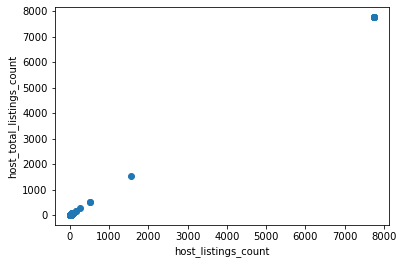

minimum_minimum_nights vs minimum_nights             0.9989216141282671


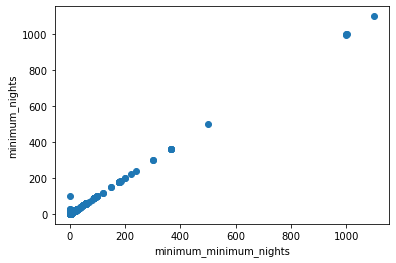

minimum_nights vs maximum_minimum_nights             0.9917229223230636


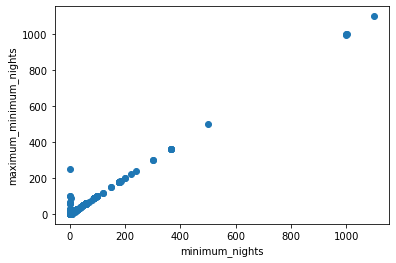

minimum_nights_avg_ntm vs minimum_nights             0.9987243513806399


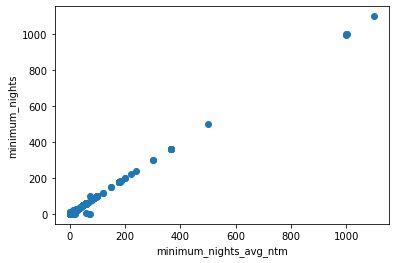

minimum_minimum_nights vs maximum_minimum_nights             0.990787666043252


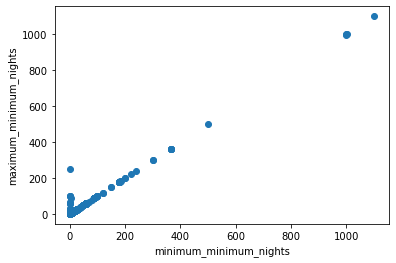

minimum_minimum_nights vs minimum_nights_avg_ntm             0.9983571083397326


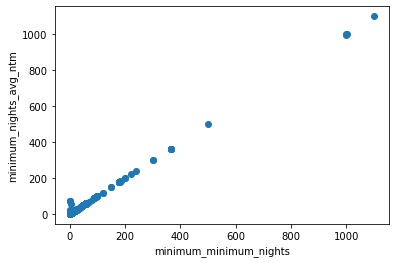

minimum_nights_avg_ntm vs maximum_minimum_nights             0.9942158997257028


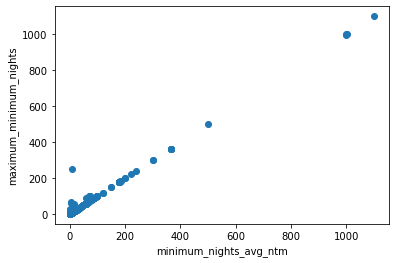

maximum_nights_avg_ntm vs maximum_maximum_nights             0.9999993586445493


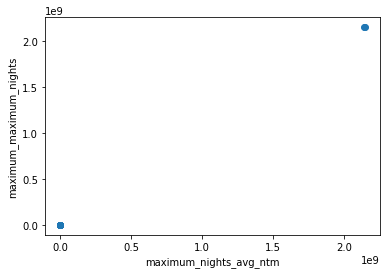

availability_60 vs availability_30             0.9838470679740401


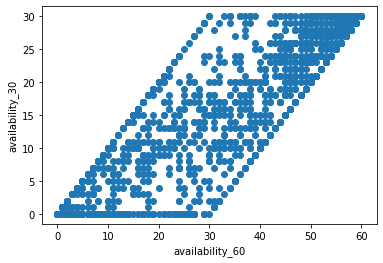

availability_90 vs availability_30             0.964420756442537


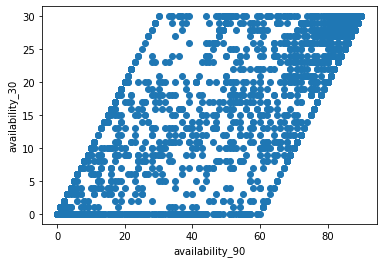

availability_90 vs availability_60             0.9922816383962931


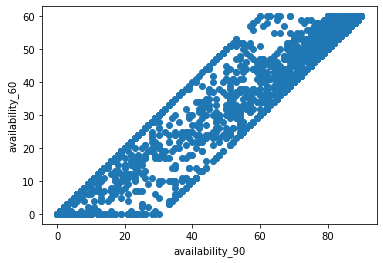

availability_365 vs availability_60             0.8090581687063201


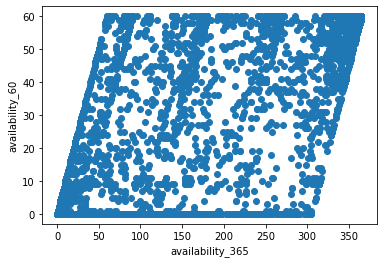

availability_90 vs availability_365             0.8255044516673116


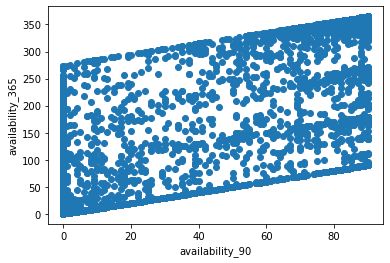

reviews_per_month vs number_of_reviews             0.8367251201786963


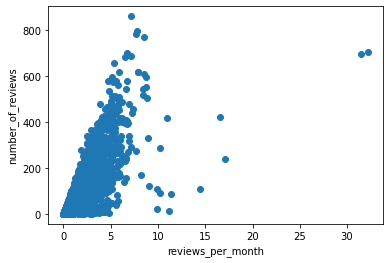

calculated_host_listings_count_entire_homes vs calculated_host_listings_count             0.9783578786581977


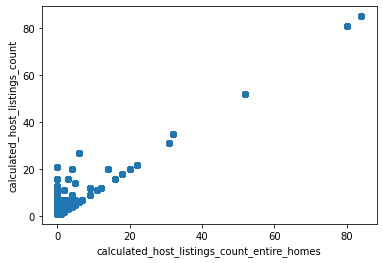

In [11]:
pearson_x_grupo(df,numericas,'0.8:1')

In [16]:
corr = df[numericas].corr(method = 'pearson')
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

C:\Users\XMX5634\AppData\Local\Temp/ipykernel_13564/3371815011.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)
C:\Users\XMX5634\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\XMX5634\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.00,nan,0.53,0.05,0.05,nan,-0.01,nan,-0.02,-0.03,0.01,-0.03,0.01,-0.03,-0.03,0.01,0.02,-0.03,0.02,nan,0.12,0.12,0.12,0.06,-0.27,0.07,0.06,-0.03,-0.07,-0.05,-0.08,-0.08,0.06,-0.02,0.10,0.07,0.16,0.05,-0.02
scrape_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
host_id,0.53,nan,1.00,0.02,0.02,nan,0.00,nan,-0.01,0.01,-0.00,-0.02,0.02,-0.02,-0.02,0.02,0.03,-0.02,0.03,nan,0.14,0.14,0.14,0.14,-0.11,0.12,0.07,-0.13,-0.13,-0.09,-0.11,-0.13,-0.00,-0.08,0.02,-0.04,0.23,0.07,0.09
host_listings_count,0.05,nan,0.02,1.00,1.00,nan,-0.01,nan,-0.01,-0.01,0.03,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,0.02,0.02,0.02,0.04,-0.01,-0.00,0.00,-0.13,-0.10,-0.08,-0.20,-0.15,-0.03,-0.09,0.07,0.06,0.07,0.00,0.01
host_total_listings_count,0.05,nan,0.02,1.00,1.00,nan,-0.01,nan,-0.01,-0.01,0.03,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,0.02,0.02,0.02,0.04,-0.01,-0.00,0.00,-0.13,-0.10,-0.08,-0.20,-0.15,-0.03,-0.09,0.07,0.06,0.07,0.00,0.01
neighbourhood_group_cleansed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
accommodates,-0.01,nan,0.00,-0.01,-0.01,nan,1.00,nan,0.70,0.78,0.31,0.01,-0.02,0.01,0.01,-0.00,-0.01,0.01,-0.01,nan,0.01,0.01,0.00,0.03,-0.05,-0.01,-0.01,-0.02,-0.04,-0.05,-0.01,-0.01,-0.05,-0.03,0.01,0.03,-0.08,-0.02,-0.06
bathrooms,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,-0.02,nan,-0.01,-0.01,-0.01,nan,0.70,nan,1.00,0.69,0.25,0.01,-0.03,0.01,0.01,-0.00,-0.01,0.01,-0.01,nan,-0.01,-0.01,-0.02,-0.00,-0.09,-0.04,-0.03,0.02,-0.01,-0.02,0.01,0.01,-0.03,0.01,-0.01,0.01,-0.09,-0.03,-0.11
beds,-0.03,nan,0.01,-0.01,-0.01,nan,0.78,nan,0.69,1.00,0.25,0.00,-0.03,-0.00,0.00,-0.00,-0.01,0.00,-0.01,nan,0.03,0.02,0.02,0.05,-0.02,-0.00,-0.01,-0.02,-0.04,-0.03,-0.00,-0.01,-0.03,-0.01,0.00,0.01,-0.02,0.01,-0.03


In [34]:
# Pregunta1
aux = df[['review_scores_communication','review_scores_rating','room_type']].dropna()

review_scores_communication vs review_scores_rating             0.6582389490883733


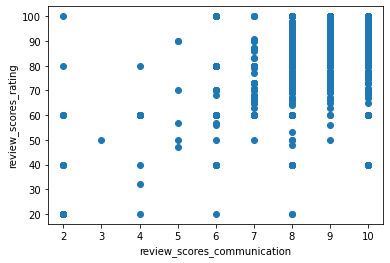

In [39]:
target = ['review_scores_communication','review_scores_rating']
pearson_x_grupo(aux,target,'-1:1')

In [62]:
# Pregunta 2 
df2 = df[['price', 'bedrooms']].dropna()
df2 = df2[df2['price'] != 0]
df2 = df2[df2['bedrooms'] != 0]
df2 = df2[df2['price'] < 400]
df2 = df2[df2['bedrooms'] <= 5]

In [65]:
df2.corr(method = 'spearman')

,price,bedrooms
price,1.000000,0.470924
bedrooms,0.470924,1.000000


price vs bedrooms             0.47092372957156564


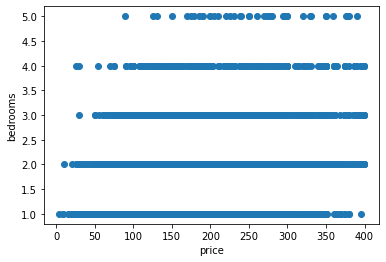

In [69]:
pearson_x_grupo(df2,['price','bedrooms'],'-1:1', 'spearman')

al observar la gráfica y calcular el coeficiente de Spearman (0.46), se observa que la existe un grado de correlación entre ambas variables (en particular entre mayor es el precio, se ofrecen más habitaciones).

Aunque el coeficiente de correlación de Pearson entre las variables sea igual a 0.65, en este caso, se sugiere calcular el coeficiente de Spearman para poder determinar si en verdad puede existir un grado de correlación monótona más fuerte entre las variables “review_scores_communication” y “review_scores_rating” que no necesariamente sea lineal.